In [269]:
import pandas as pd
import numpy as np
from pprint import pprint
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2')
import re
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

In [270]:
df = pd.read_csv('./drive/MyDrive/emails_truncated.csv',nrows=10000)

In [271]:
df.message.iloc[0]

"Message-ID: <18782981.1075855378110.JavaMail.evans@thyme>\nDate: Mon, 14 May 2001 16:39:00 -0700 (PDT)\nFrom: phillip.allen@enron.com\nTo: tim.belden@enron.com\nSubject: \nMime-Version: 1.0\nContent-Type: text/plain; charset=us-ascii\nContent-Transfer-Encoding: 7bit\nX-From: Phillip K Allen\nX-To: Tim Belden <Tim Belden/Enron@EnronXGate>\nX-cc: \nX-bcc: \nX-Folder: \\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail\nX-Origin: Allen-P\nX-FileName: pallen (Non-Privileged).pst\n\nHere is our forecast\n\n "

In [272]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def text_preprocessing_body(text):
    from_pattern = r"From: (.+)"
    to_pattern = r"To: (.+)"
    pattern = r"(?<=\n\n).*"

    text = re.findall(pattern,text,re.DOTALL)[0]
    text = re.sub(r'(@.*?)[\s]', ' ', text)
    text = re.sub(r'&amp;', '&', text)
    text = re.sub(r'\s+', ' ', text).strip()
    w = []
    for word in text.split():
        if word not in stop_words:
            w.append(word)
    return ' '.join(w)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [273]:
def text_preprocessing_from(text):
    from_pattern = r"From: (.+)"
    to_pattern = r"To: (.+)"
    pattern = r"(?<=\n\n).*"
    from_match = re.search(from_pattern, text).group(1)

    return from_match

In [274]:
def text_preprocessing_date(text):
  date_match = re.search(r'Date: (.+)', text)
  date_str = date_match.group(1)

  return date_str

In [275]:
def text_preprocessing_to(text):
    # print(text)
    from_pattern = r"From: (.+)"
    to_pattern = r"To: (.+)"
    pattern = r"(?<=\n\n).*"
    to_match = ''
    try:
        to_match = re.search(to_pattern, text).group(1)
    except AttributeError:
        to_match = ''
    return to_match

In [276]:
df = df.dropna()

In [277]:
df["body"] = df["message"].apply(lambda x:text_preprocessing_body(x))
df["from"] = df["message"].apply(lambda x:text_preprocessing_from(x))
df["to"] = df["message"].apply(lambda x:text_preprocessing_to(x))
df["date"] = df["message"].apply(lambda x:text_preprocessing_date(x))

In [278]:
# db = DBSCAN(eps=1.1,min_samples=10).fit(embeddings)
# core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
# core_samples_mask[db.core_sample_indices_]= True
# labels = db.labels_

In [279]:
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
# n_noise_ = list(labels).count(-1)

In [280]:
df["to"] = df["to"].apply(lambda x: x.split(","))

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [281]:
new_data = []
for index, row in df.iterrows():
    from_user = row['from']
    to_users = row['to']
    message = row['body']

    # Convert the 'to' list to individual strings and duplicate the record
    for to_user in to_users:
        new_data.append({'from': from_user, 'to': to_user, 'message': message})

# Create a new DataFrame from the modified data
new_df = pd.DataFrame(new_data)

In [ ]:
for idx,sender in new_df.iterrows():
    new_df.loc[idx,"sentiment"] = analyzer.polarity_scores(sender["message"])['compound']
new_df.to_csv('emails_with_senitment')

In [ ]:
df['from'].unique()

array(['phillip.allen@enron.com', 'ina.rangel@enron.com',
       '1.11913372.-2@multexinvestornetwork.com',
       'messenger@ecm.bloomberg.com', 'aod@newsdata.com',
       'critical.notice@enron.com', 'market-reply@listserv.dowjones.com',
       'rebecca.cantrell@enron.com', 'webmaster@earnings.com',
       'paul.kaufman@enron.com', 'yild@zdemail.zdlists.com',
       'bounce-news-932653@lists.autoweb.com',
       'public.relations@enron.com', 'stephanie.miller@enron.com',
       'tracy.arthur@enron.com', 'sarah.novosel@enron.com',
       'bobregon@bga.com', 'subscriptions@intelligencepress.com',
       'tim.heizenrader@enron.com', 'rob_tom@freenet.carleton.ca',
       'calxa@aol.com', 'ei_editor@ftenergy.com',
       'billc@greenbuilder.com', 'frank.hayden@enron.com',
       'matt@fastpacket.net', 'jfreeman@ssm.net',
       'owner-strawbale@crest.org', 'kim.ward@enron.com',
       'grensheltr@aol.com', 'yahoo-delivers@yahoo-inc.com',
       'perfmgmt@enron.com', 'announce@inbox.nytime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
new_df = pd.read_csv('./drive/MyDrive/emails_with_sentiment.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [140]:
grouped_df = new_df.groupby(['from', 'to'])['sentiment'].mean().reset_index()
grouped_df = grouped_df.sort_values(by="sentiment")

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
grouped_df['to_count'] = grouped_df.groupby('from')['to'].transform('count')

In [ ]:
grouped_df['count'] = new_df.groupby(['from', 'to'])['sentiment'].transform('count')

In [ ]:
grouped_df

from  \
517                       eric.bass@enron.com   
487                       eric.bass@enron.com   
1079                  jeff.dasovich@enron.com   
1077                  jeff.dasovich@enron.com   
2144                     no.address@enron.com   
...                                       ...   
8     407982.16792233.1@1.americanexpress.com   
706                 herthateng4882@excite.com   
558               feedback@travelocity.m0.net   
2850     thestreet@offers2.mail-thestreet.com   
1426                    john.arnold@enron.com   

                                                     to  sentiment  to_count  \
517                              phillip.love@enron.com    -0.9968        39   
487                           michael.walters@enron.com    -0.9967        39   
1079                          richard.shapiro@enron.com    -0.9941        13   
1077                              joe.hartsoe@enron.com    -0.9941        13   
2144       Outage Report@ENRON <??SOutage Report@ENRON>    -0.9764        14   
...                                                 ...        ...       ...   
8                                  jarnold@ei.enron.com     0.9998         1   
706   undisclosed-recipients:;@ENRON <??Sundisclosed...     0.9998         1   
558                                harora@ect.enron.com     0.9999         1   
2850                              jarnold@ect.enron.com     0.9999         2   
1426                          motaylor@grantthornton.ca     1.0000       325   

      count  
517    20.0  
487     4.0  
1079   11.0  
1077   57.0  
2144    5.0  
...     ...  
8       3.0  
706   124.0  
558    14.0  
2850    2.0  
1426    9.0  

[2969 rows x 5 columns]

In [ ]:
plot_df = grouped_df[grouped_df["from"] == "eric.bass@enron.com"]

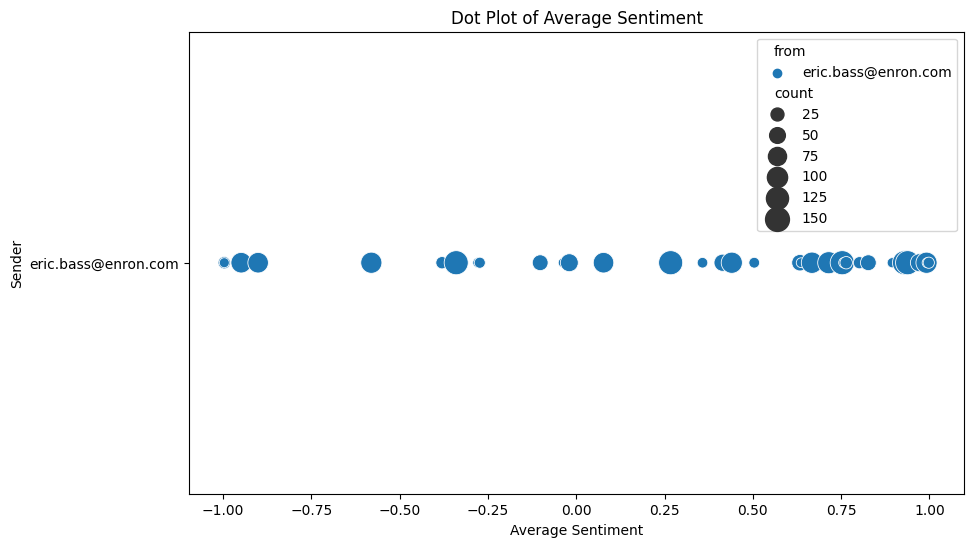

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, y='from', x='sentiment', hue='from', size='count', sizes=(50, 300))
plt.xlabel('Average Sentiment')
plt.ylabel('Sender')
plt.title('Dot Plot of Average Sentiment')
# plt.legend(title='Recipient (to)')
# plt.grid(True)
plt.show()

# Let's Perform a One Class SVM Classification
One-class classification algorithms can be used for binary classification tasks with a severely skewed class distribution. These techniques can be fit on the input examples from the majority class in the dataset. Giving an irrelevant label to the data that it basically "weird"

In [ ]:
from sklearn.svm import OneClassSVM
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(df["body"])

In [ ]:
svm = OneClassSVM(kernel='poly', nu=0.1)
svm.fit(X)
predictions = svm.predict(X)

In [ ]:
unique, counts = np.unique(predictions, return_counts=True)

In [ ]:
counts

array([3352, 6648])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

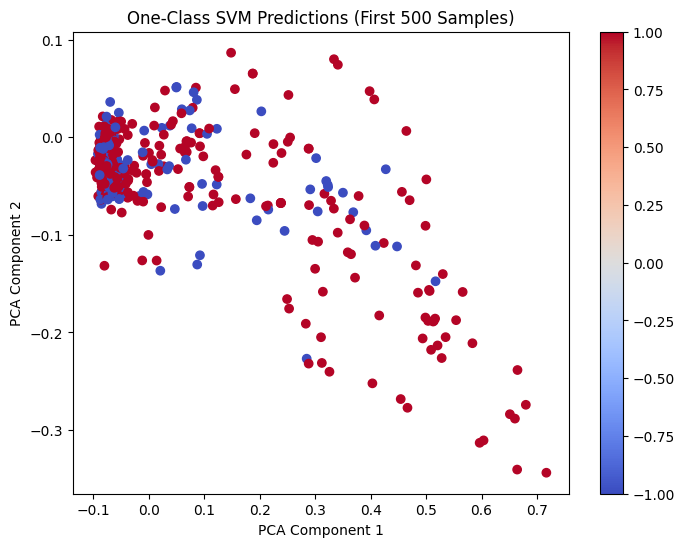

In [ ]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())
num_samples_to_plot = 500
X_pca_subset = X_pca[:num_samples_to_plot]
predictions_subset = predictions[:num_samples_to_plot]
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_subset[:, 0], X_pca_subset[:, 1], c=predictions_subset, cmap='coolwarm', marker='o')
plt.colorbar()
plt.title("One-Class SVM Predictions (First 500 Samples)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


In [ ]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X.toarray())  # Convert sparse matrix to dense array

# Select the first 500 values for graphing
num_samples_to_plot = 500
X_tsne_subset = X_tsne[:num_samples_to_plot]
predictions_subset = predictions[:num_samples_to_plot]

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_subset[:, 0], X_tsne_subset[:, 1], c=predictions_subset, cmap='coolwarm', marker='o')
plt.colorbar()
plt.title("One-Class SVM Predictions using t-SNE (First 500 Samples)")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()

In [ ]:
new_data = {'text': df['body'], 'label': ['irrelevant' if pred == -1 else 'relevant' for pred in predictions]}
new_df = pd.DataFrame(new_data)


In [ ]:
! pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=8428bb59fa00ba14d51088161ba5ee2975688d088d8ee0c2a6179733e6a7a2b9
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


# Explaining Predictions

I am using LIME to explain my predictions all the highlighted words are the ones that effect the classifier the most. A classification of -1 is NOT RELEVANT and classification of 1 is RELEVANT



In [ ]:
new_df.head

<bound method NDFrame.head of                                                    text       label
0                                         Here forecast    relevant
1     Traveling business meeting takes fun trip. Esp...  irrelevant
2                            test successful. way go!!!    relevant
3     Randy, Can send schedule salary level everyone...    relevant
4                            Let's shoot Tuesday 11:45.    relevant
...                                                 ...         ...
9995  shes pretty sexy, huh? getting together talk e...  irrelevant
9996                        copied idea - screwed name!    relevant
9997  ---------------------- Forwarded Eric Bass/HOU...    relevant
9998                                     buy enron 60s?    relevant
9999  Yea, thanks reminding b-day, I nearly forgot (...    relevant

[10000 rows x 2 columns]>

In [ ]:
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

instance_index =  9995 # For example, explaining the second instance
instance = new_df.loc[instance_index, 'text']
# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=["relevant","irrelevant"])
# Define a function that predicts anomalies using the decision function
new_predict = lambda x: svm.predict(vectorizer.transform(x)).reshape(-1, 1)

# Explain the instance

explanation = explainer.explain_instance(instance, new_predict,labels=(0,))

# Display the explanation
explanation.show_in_notebook(text=True)


In [ ]:
from lime.lime_text import LimeTextExplainer
from sklearn.pipeline import make_pipeline

instance_index = 3  # For example, explaining the second instance
instance = new_df.loc[instance_index, 'text']
# Create a LimeTextExplainer
explainer = LimeTextExplainer(class_names=["relevant"])
# Define a function that predicts anomalies using the decision function
new_predict = lambda x: svm.predict(vectorizer.transform(x)).reshape(-1, 1)

# Explain the instance

explanation = explainer.explain_instance(instance, new_predict,labels=(0,))

# Display the explanation
explanation.show_in_notebook(text=True)


# Graph and Node Connection with the Matrix


In [176]:
! pip install networkx
! pip install plotly

In [178]:
import matplotlib.pyplot as plt
import networkx as nx
import plotly.graph_objects as go

In [141]:
new_df['count'] = new_df.groupby(['from', 'to']).transform('count')

In [165]:
shuffled = new_df.sample(frac=1).reset_index(drop=True)[:100]

In [189]:
shuffled

from                             to  \
0       john.arnold@enron.com      jennifer.fraser@enron.com   
1     phillip.allen@enron.com            jsmith@austintx.com   
2     phillip.allen@enron.com  nicholasnelson@centurytel.net   
3        m..schmidt@enron.com                                  
4       john.arnold@enron.com           epao@mba2002.hbs.edu   
..                        ...                            ...   
95       susan.mara@enron.com        robert.badeer@enron.com   
96  jeff.youngflesh@enron.com          kathy.shaps@enron.com   
97   messenger@directtrak.com              jarnold@enron.com   
98     mike.grigsby@enron.com              mog.heu@enron.com   
99        jae.black@enron.com                       Gulmeden   

                                              message  count  
0   sure From: Jennifer Fraser/ENRON 04/26/2001 10...    197  
1   Jeff, I office today. Any isssues deal stageco...    124  
2   Bruce, Thank bid. I decided floor plan. I goin...      4  
3   OUTLOOK Enron Q3 EPS 43 cents vs 34 AFX News, ...     32  
4   Expected value game = 1/2 * 0 + 1/4 * 1 + 1/8 ...    118  
..                                                ...    ...  
95  Dan Douglass summarized this. This really puts...      3  
96  Ali, The "Bridge" referred voice message one w...      2  
97  [IMAGE]=09 Vol. 1, No. 7 * December 2001 Table...      2  
98  -----Original Message----- From: Polsky, Phil ...      5  
99  This revised...please see below. =20 -----Orig...      8  

[100 rows x 4 columns]

In [217]:
# Create a graph
G = nx.Graph()
import math
# Add nodes and edges with attributes
for idx, row in shuffled.iterrows():
    G.add_edge(row['from'], row['to'], weight=math.log(row['count']))

# Create Plotly figure
pos = nx.spring_layout(G)  # Layout algorithm

# Separate centers and other nodes
center_nodes = list(shuffled['from'].unique())
other_nodes = [node for node in G.nodes() if node not in center_nodes]

fig = go.Figure()

# Add center nodes
for node in center_nodes:
    x, y = pos[node]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=15, color='blue'), hoverinfo='text',text=node))

# Add other nodes
for node in other_nodes:
    x, y = pos[node]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=10, color='red'), hoverinfo='text',text=node))

# Add edges with varying widths based on 'count'
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    width = edge[2]['weight']
    fig.add_trace(go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=width, color='gray'), hoverinfo='none'))

fig.update_layout(
    title='Interactive Network Visualization',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()

# For a Specific Person

In [215]:
id_shuffled = shuffled[(shuffled["from"] == input("Who do you want to probe: ")) & (shuffled["to"].str.len() > 0)]
print(id_shuffled)
# Create a graph
G = nx.Graph()
import math
# Add nodes and edges with attributes
for idx, row in id_shuffled.iterrows():
    G.add_edge(row['from'], row['to'], weight=math.log(row['count']))

# Create Plotly figure
pos = nx.spring_layout(G)  # Layout algorithm

# Separate centers and other nodes
center_nodes = list(id_shuffled['from'].unique())
other_nodes = [node for node in G.nodes() if node not in center_nodes]

fig = go.Figure()

# Add center nodes
for node in center_nodes:
    x, y = pos[node]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=15, color='blue'), hoverinfo='text',text=node))

# Add other nodes
for node in other_nodes:
    x, y = pos[node]
    fig.add_trace(go.Scatter(x=[x], y=[y], mode='markers', marker=dict(size=10, color='red'), hoverinfo='text',text=node))

# Add edges with varying widths based on 'count'
for edge in G.edges(data=True):
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    width = edge[2]['weight']
    fig.add_trace(go.Scatter(x=[x0, x1, None], y=[y0, y1, None], mode='lines', line=dict(width=width, color='gray'), hoverinfo='none'))

fig.update_layout(
    title='Interactive Network Visualization',
    titlefont_size=16,
    showlegend=False,
    hovermode='closest',
    margin=dict(b=0, l=0, r=0, t=0),
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)
)

fig.show()

Who do you want to probe: john.arnold@enron.com
                     from                           to  \
0   john.arnold@enron.com    jennifer.fraser@enron.com   
4   john.arnold@enron.com         epao@mba2002.hbs.edu   
6   john.arnold@enron.com    caroline.abramo@enron.com   
8   john.arnold@enron.com      slafontaine@globalp.com   
14  john.arnold@enron.com    jennifer.fraser@enron.com   
16  john.arnold@enron.com     fletcher.sturm@enron.com   
19  john.arnold@enron.com        john.arnold@enron.com   
20  john.arnold@enron.com     brian.o'rourke@enron.com   
36  john.arnold@enron.com      slafontaine@globalp.com   
38  john.arnold@enron.com         mike.maggi@enron.com   
43  john.arnold@enron.com          larry.may@enron.com   
44  john.arnold@enron.com    houston <.ward@enron.com>   
45  john.arnold@enron.com    jennifer.fraser@enron.com   
51  john.arnold@enron.com  tanya.tamarchenko@enron.com   
52  john.arnold@enron.com          m..presto@enron.com   
53  john.arnold@enron.co

# Graph How many mails were sent and recieved


In [219]:
# Summary of mail sent
shuffled

from                             to  \
0       john.arnold@enron.com      jennifer.fraser@enron.com   
1     phillip.allen@enron.com            jsmith@austintx.com   
2     phillip.allen@enron.com  nicholasnelson@centurytel.net   
3        m..schmidt@enron.com                                  
4       john.arnold@enron.com           epao@mba2002.hbs.edu   
..                        ...                            ...   
95       susan.mara@enron.com        robert.badeer@enron.com   
96  jeff.youngflesh@enron.com          kathy.shaps@enron.com   
97   messenger@directtrak.com              jarnold@enron.com   
98     mike.grigsby@enron.com              mog.heu@enron.com   
99        jae.black@enron.com                       Gulmeden   

                                              message  count  
0   sure From: Jennifer Fraser/ENRON 04/26/2001 10...    197  
1   Jeff, I office today. Any isssues deal stageco...    124  
2   Bruce, Thank bid. I decided floor plan. I goin...      4  
3   OUTLOOK Enron Q3 EPS 43 cents vs 34 AFX News, ...     32  
4   Expected value game = 1/2 * 0 + 1/4 * 1 + 1/8 ...    118  
..                                                ...    ...  
95  Dan Douglass summarized this. This really puts...      3  
96  Ali, The "Bridge" referred voice message one w...      2  
97  [IMAGE]=09 Vol. 1, No. 7 * December 2001 Table...      2  
98  -----Original Message----- From: Polsky, Phil ...      5  
99  This revised...please see below. =20 -----Orig...      8  

[100 rows x 4 columns]

In [222]:
shuffled_sent = []
for row in shuffled["from"].unique():
  shuffled_r = {}
  shuffled_r["from"] = row
  shuffled_r["count"] = len(shuffled[shuffled["from"] == row])
  shuffled_sent.append(shuffled_r)
shuffled_sent_df = pd.DataFrame(shuffled_sent)

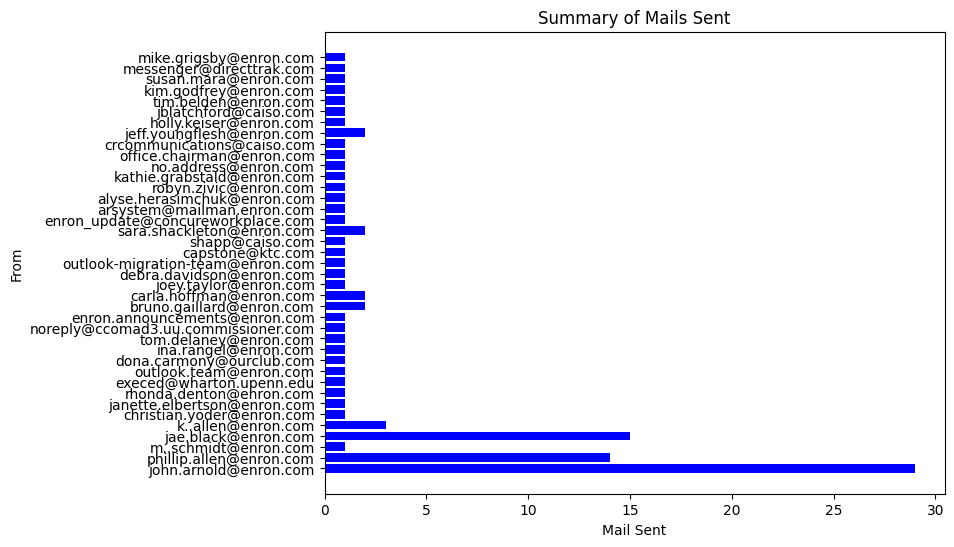

In [235]:
plt.figure(figsize=(8, 6))  # Set figure size (width, height)
plt.barh(shuffled_sent_df['from'], shuffled_sent_df['count'], color='blue')  # Horizontal bar plot
plt.xlabel('Mail Sent')  # X-label
plt.ylabel('From')  # Y-label
plt.title('Summary of Mails Sent')  # Plot title
plt.show()

# For Mails Recieved

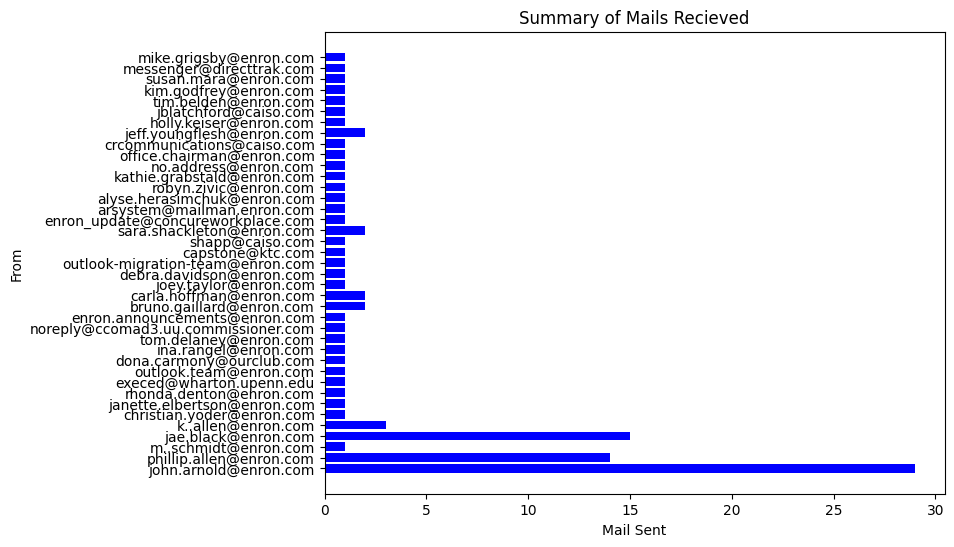

In [237]:
shuffled_sent = []
for row in shuffled["from"].unique():
  shuffled_r = {}
  shuffled_r["to"] = row
  shuffled_r["count"] = len(shuffled[shuffled["from"] == row])
  shuffled_sent.append(shuffled_r)
shuffled_sent_df = pd.DataFrame(shuffled_sent)

plt.figure(figsize=(8, 6))  # Set figure size (width, height)
plt.barh(shuffled_sent_df['to'], shuffled_sent_df['count'], color='blue')  # Horizontal bar plot
plt.xlabel('Mail Sent')  # X-label
plt.ylabel('From')  # Y-label
plt.title('Summary of Mails Recieved')  # Plot title
plt.show()

In [326]:
df['date'] = pd.to_datetime(df['date'],utc=True)  # Convert 'date' column to datetime format
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
email_count_by_month = df.groupby(['year', 'month']).size().reset_index(name='email_count')


In [327]:
import calendar
email_count_by_month['month'] = email_count_by_month['month'].apply(lambda x: calendar.month_name[x])

In [328]:
email_count_by_month

year      month  email_count
0   1980    January           20
1   1999   December            8
2   2000    January           95
3   2000   February          109
4   2000      March          172
5   2000      April          100
6   2000        May           91
7   2000       June          265
8   2000       July          401
9   2000     August          972
10  2000  September          414
11  2000    October          423
12  2000   November          333
13  2000   December          735
14  2001    January          476
15  2001   February          589
16  2001      March          535
17  2001      April          605
18  2001        May          631
19  2001       June          126
20  2001       July          121
21  2001     August          121
22  2001  September          164
23  2001    October         1054
24  2001   November          781
25  2001   December          268
26  2002    January          138
27  2002   February          116
28  2002      March          137

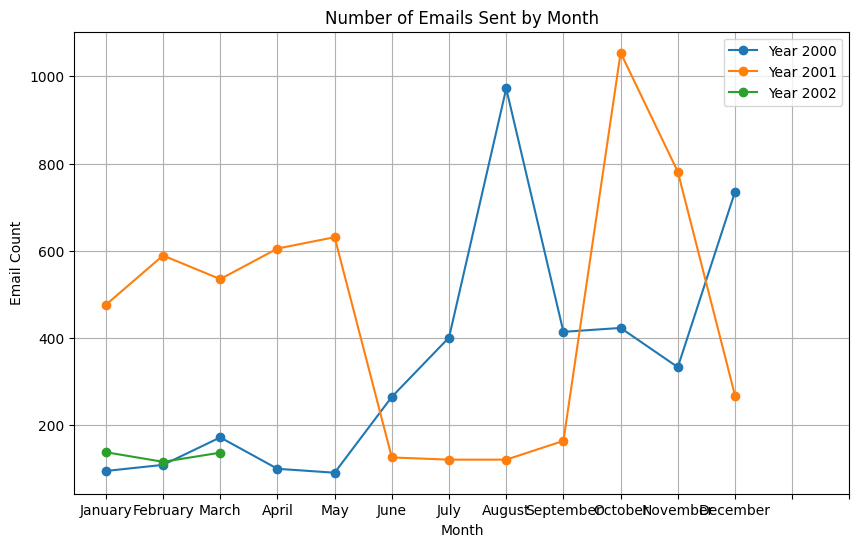

In [331]:
plt.figure(figsize=(10, 6))

# Group by year and plot lines for each year
for year, group in email_count_by_month[2:].groupby('year'):
    plt.plot(group['month'], group['email_count'], marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel('Month')
plt.ylabel('Email Count')
plt.title('Number of Emails Sent by Month')
plt.xticks(range(0, 14))  # Assuming months are 1-12
plt.grid(True)
plt.legend()
plt.show()